# Historical prices of the 10 most popular cryptocurrencies

This project is a course project of [Data Analysis with Python: Zero to Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas). It is going to be analysed, what values the most popular cryptocurrencies have, how those values were altered over time, what the relation among those currencies is and many other interesting statistical data.  
A useful resource about the code below can be found in the lessons on the link above, as well as in some links where the code is located. In addition, some helpful links are:  
Regarding [numpy](https://numpy.org/doc/stable/)  
Regarding [pandas](https://pandas.pydata.org/docs/search.html)  
Regarding [matplotlib](https://matplotlib.org/stable/tutorials/index)  
Regarding [seaborn](http://seaborn.pydata.org/index.html)  
Regarding [markdown](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd)  
The dataset was taken from https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory .

## Downloading the Dataset

To begin with, the dataset must be downloaded. In https://www.kaggle.com/datasets?fileType=csv a lot of interesting datasets can be found. The following dataset as well as informations about it or the contributor(s) can be found [here](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory). 

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
dataset_url = 'https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory'

In [2]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle username:

The dataset has been downloaded and extracted.

In [1]:
data_dir = './cryptocurrencypricehistory'
data_dir

'./cryptocurrencypricehistory'

In [2]:
import os
os.listdir(data_dir)

['coin_Aave.csv',
 'coin_BinanceCoin.csv',
 'coin_Bitcoin.csv',
 'coin_Cardano.csv',
 'coin_ChainLink.csv',
 'coin_Cosmos.csv',
 'coin_CryptocomCoin.csv',
 'coin_Dogecoin.csv',
 'coin_EOS.csv',
 'coin_Ethereum.csv',
 'coin_Iota.csv',
 'coin_Litecoin.csv',
 'coin_Monero.csv',
 'coin_NEM.csv',
 'coin_Polkadot.csv',
 'coin_Solana.csv',
 'coin_Stellar.csv',
 'coin_Tether.csv',
 'coin_Tron.csv',
 'coin_Uniswap.csv',
 'coin_USDCoin.csv',
 'coin_WrappedBitcoin.csv',
 'coin_XRP.csv']

## Data Preparation and Cleaning

First of all, a data preparation must be done in order for the data to have a valid format, otherwise there may be wrong or unformatted data. Hence, they may lead to incorrect inferences. Moreover, there might be missing values or entries or duplicated entries to name a few and therefore the following actions are often done for a good data preparation and cleaning step:
* Removing empty cells
* Removing duplicates
* Editing wrong format
* Handling wrong data

In this step the 10 most popular cryptocurrencies are taken into consideration. See [here](https://www.bankrate.com/investing/types-of-cryptocurrency/) a list with the most popular cryptocurrencies and for information about them. The following dataframes are created by reading the `.csv` files:

In [3]:
import pandas as pd

In [4]:
bitcoin_df = pd.read_csv(data_dir + '/coin_Bitcoin.csv')
ethereum_df = pd.read_csv(data_dir + '/coin_Ethereum.csv')
tether_df = pd.read_csv(data_dir + '/coin_Tether.csv')
usdcoin_df = pd.read_csv(data_dir + '/coin_USDCoin.csv')
binancecoin_df = pd.read_csv(data_dir + '/coin_BinanceCoin.csv')
xrp_df = pd.read_csv(data_dir + '/coin_XRP.csv')
cardano_df = pd.read_csv(data_dir + '/coin_Cardano.csv')
solana_df = pd.read_csv(data_dir + '/coin_Solana.csv')
dogecoin_df = pd.read_csv(data_dir + '/coin_Dogecoin.csv')
polkadot_df = pd.read_csv(data_dir + '/coin_Polkadot.csv')

Make a list of those cryptocoins:

In [5]:
cryptolist = [
bitcoin_df,
ethereum_df,
tether_df,
usdcoin_df,
binancecoin_df,
xrp_df,
cardano_df,
solana_df,
dogecoin_df,
polkadot_df
]

Show an example of a dataframe:

In [6]:
cryptolist[0]

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [7]:
cryptolist[0].shape

(2991, 10)

In [8]:
cryptolist[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


The column `date` is converted to the correct format and the columns `Volume` and `Marketcap` are expressed in billion USD in order for the dataset to be read easier:

In [9]:
for m in range(0,10):
    cryptolist[m].Volume /= 1e9
    cryptolist[m].Marketcap /= 1e9
    cryptolist[m].Date = pd.to_datetime(cryptolist[m].Date)
    cryptolist[m].drop(['SNo'], axis=1, inplace=True)

Another example:

In [10]:
cardano_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,0.057641,0.628899
1,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,0.016998,0.539693
2,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,0.009000,0.568620
3,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,0.005563,0.557139
4,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,0.007781,0.480665
...,...,...,...,...,...,...,...,...,...
1369,Cardano,ADA,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410,44.545866
1370,Cardano,ADA,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094,44.943242
1371,Cardano,ADA,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362,46.583638
1372,Cardano,ADA,2021-07-05 23:59:59,1.461221,1.379284,1.461221,1.404898,1.759461,44.881336


It would be very useful if a dataframe with all ten coins is created:

In [11]:
cryptos_df = pd.concat(cryptolist, axis=0)

In [12]:
cryptos_df = cryptos_df.sort_values('Date')

In [68]:
cryptos_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Relvalue,Dvalue,Circ,Dsquared
0,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000,1.603769,1.097022,0.075094,0.011096,11298.141921
1,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000,1.542813,1.092871,-0.034722,0.011099,11298.141921
2,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000,1.298955,1.040508,-0.158345,0.011103,11298.141921
3,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000,1.168517,0.934218,-0.095979,0.011107,11298.141921
4,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000,1.085995,0.804260,-0.080000,0.011110,11298.141921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Polkadot,DOT,2021-07-02 23:59:59,15.469187,14.675115,15.219061,15.340774,0.753195,14.683489,5.339868,0.007997,0.957154,13.735707
316,Polkadot,DOT,2021-07-03 23:59:59,15.776978,15.068263,15.321934,15.553716,0.711235,14.890349,5.446115,0.015127,0.957350,13.735707
317,Polkadot,DOT,2021-07-04 23:59:59,16.579445,15.221813,15.553584,16.014026,0.752076,15.335470,5.723122,0.029604,0.957627,13.735707
318,Polkadot,DOT,2021-07-05 23:59:59,15.996540,14.788740,15.996540,15.235582,0.844845,14.593232,5.521907,-0.047570,0.957839,13.735707


Now it is expected that the data have a valid format:

In [13]:
cryptos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17712 entries, 0 to 319
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       17712 non-null  object        
 1   Symbol     17712 non-null  object        
 2   Date       17712 non-null  datetime64[ns]
 3   High       17712 non-null  float64       
 4   Low        17712 non-null  float64       
 5   Open       17712 non-null  float64       
 6   Close      17712 non-null  float64       
 7   Volume     17712 non-null  float64       
 8   Marketcap  17712 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.4+ MB


In [14]:
cryptos_df.shape

(17712, 9)

All duplicates and NA-values are removed (if any):

In [15]:
cryptos_df.drop_duplicates(inplace=True) #remove duplicates and replace the current dataframe

In [16]:
cryptos_df.count() #counts the non-NA values

Name         17712
Symbol       17712
Date         17712
High         17712
Low          17712
Open         17712
Close        17712
Volume       17712
Marketcap    17712
dtype: int64

In [17]:
cryptos_df.shape

(17712, 9)

The number of non-NA values equals to the number of rows of the dataframe `cryptos_df`. That means that the dataset had no duplicates or NA values!

Let's get some statistical information about our dataframe:

In [18]:
cryptos_df.describe()

,High,Low,Open,Close,Volume,Marketcap
count,17712.000000,17712.000000,17712.000000,17712.000000,17712.000000,17712.000000
mean,1217.976413,1144.666498,1183.213088,1185.241386,5.710992,29.921246
std,5430.911515,5078.835653,5268.346715,5273.966208,16.721278,100.104454
min,0.000089,0.000085,0.000087,0.000087,0.000000,0.000000
25%,0.056493,0.050985,0.053477,0.053632,0.009105,0.285829
50%,1.006657,0.999701,1.000570,1.000605,0.155748,2.723906
75%,132.726038,125.314760,128.672253,129.000000,2.441430,15.240701
max,64863.098908,62208.964366,63523.754869,63503.457930,350.967941,1186.364044


## Exploratory Analysis and Visualization

In this section we are going to explore the columns of the cryptocoins and try to make some inferences by comparing the various datasets by plotting graphs mainly.  
Additional information about plotting can be found in the following links:  
https://jovian.ai/aakashns/dataviz-cheatsheet  
https://jovian.ai/aakashns/python-matplotlib-data-visualization  
https://matplotlib.org/stable/tutorials/index  
http://seaborn.pydata.org/index.html

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [19]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In the sake of making a fair comparison the selected period should be common to all coins. The reason behind that is that some coins had a different starting point than some others. So the common earliest date is selected, where all coins are in circulation.

In [20]:
for m in range(0,10):
    start = cryptolist[m].Date.min()
    print(str(m) + ': ' + cryptolist[m].loc[0].Name + '  ' + str(start))

0: Bitcoin  2013-04-29 23:59:59
1: Ethereum  2015-08-08 23:59:59
2: Tether  2015-02-26 23:59:59
3: USD Coin  2018-10-09 23:59:59
4: Binance Coin  2017-07-26 23:59:59
5: XRP  2013-08-05 23:59:59
6: Cardano  2017-10-02 23:59:59
7: Solana  2020-04-11 23:59:59
8: Dogecoin  2013-12-16 23:59:59
9: Polkadot  2020-08-21 23:59:59


We observe that the 9th dataframe has the latest starting date. As a result this date is taken as a starting point.

In [21]:
start = cryptolist[9].Date.min()
start.year, start.month

(2020, 8)

So the starting date is August 2020.

In [22]:
for m in range(0,10):
    end = cryptolist[m].Date.max()
    print(str(m) + ': ' + str(end))

0: 2021-07-06 23:59:59
1: 2021-07-06 23:59:59
2: 2021-07-06 23:59:59
3: 2021-07-06 23:59:59
4: 2021-07-06 23:59:59
5: 2021-07-06 23:59:59
6: 2021-07-06 23:59:59
7: 2021-07-06 23:59:59
8: 2021-07-06 23:59:59
9: 2021-07-06 23:59:59


All dataframes have the same latest ending date, so the ending point is July 2021.

The coins in the period from August 2020 to July 2021 will be examined.

In [23]:
cryptos_sp_df = cryptos_df[cryptos_df.Date >= start]

Major factors such as market capitalization and volume can determine the popularity of the coin. Let's find out which coins are more popular. They are grouped into two categories: Group A and Group B:

In [24]:
cryptos_sp_df1 = cryptos_sp_df.groupby(['Name'])['Marketcap'].mean().sort_values(ascending = False).head(5)
cryptos_sp_df2 = cryptos_sp_df.groupby(['Name'])['Marketcap'].mean().sort_values(ascending = False).tail(5)

Average value of the market capitalization for **Group A**:

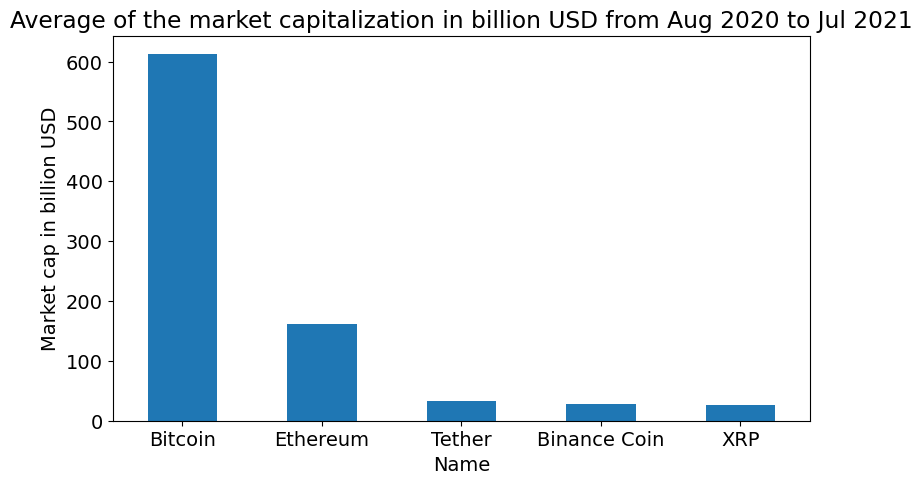

In [25]:
cryptos_sp_df1.plot.bar(ylabel='Market cap in billion USD', rot=0);
plt.title('Average of the market capitalization in billion USD from Aug 2020 to Jul 2021');

Average value of the market capitalization for **Group B**:

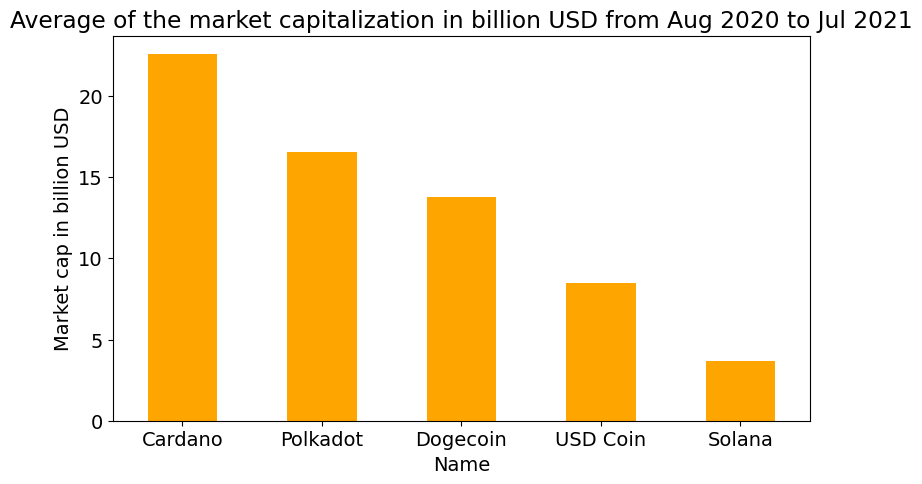

In [26]:
cryptos_sp_df2.plot.bar(ylabel='Market cap in billion USD', rot=0, color='orange');
plt.title('Average of the market capitalization in billion USD from Aug 2020 to Jul 2021');

Once again, the dataset is divided into two groups according to the total amount of the volume for the same period:

In [27]:
cryptos_sp_df1 = cryptos_df.groupby(['Name'])['Volume'].sum().sort_values(ascending = False).head(5)
cryptos_sp_df2 = cryptos_df.groupby(['Name'])['Volume'].sum().sort_values(ascending = False).tail(5)

Total amount of the volume for **Group A**:

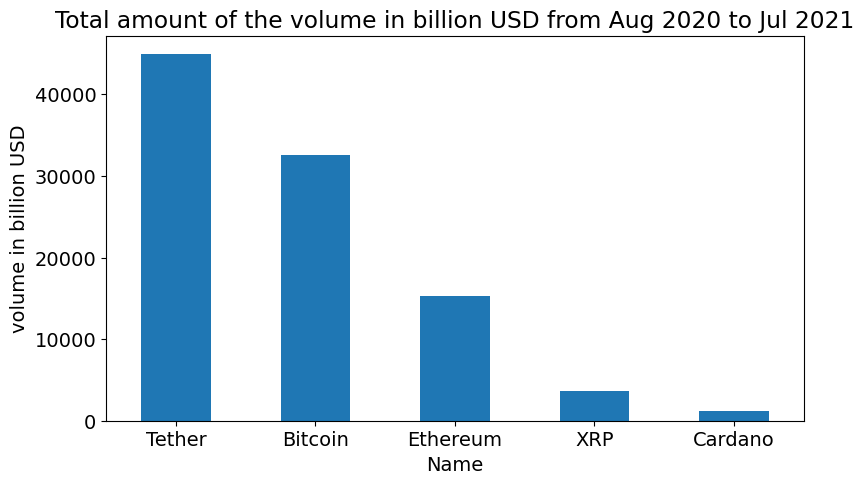

In [28]:
cryptos_sp_df1.plot.bar(ylabel='volume in billion USD', rot=0);
plt.title('Total amount of the volume in billion USD from Aug 2020 to Jul 2021');

Total amount of the volume for **Group B**:

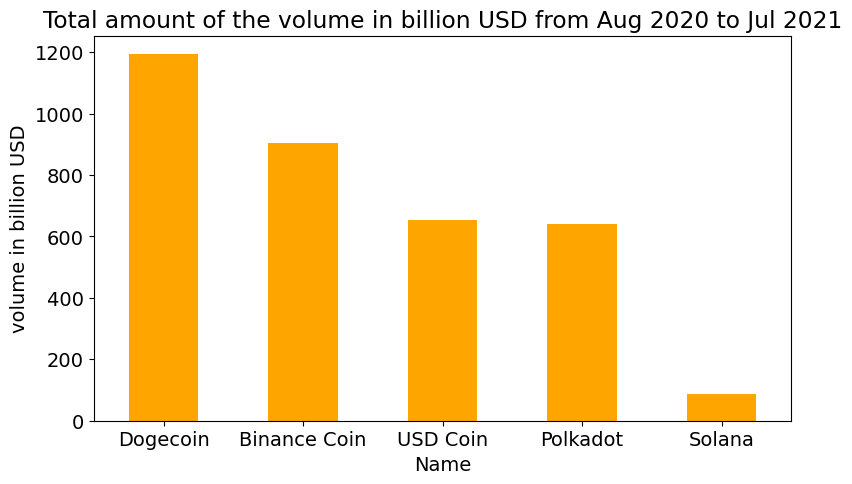

In [29]:
cryptos_sp_df2.plot.bar(ylabel='volume in billion USD', rot=0, color='orange');
plt.title('Total amount of the volume in billion USD from Aug 2020 to Jul 2021');

Now column `Close` is depicted. In other words this barchart depicts the price of the cryptocoin in the closing time:

In [30]:
cryptos_sp_df1 = cryptos_df.groupby(['Name'])['Close'].mean().sort_values(ascending = False).head(5)
cryptos_sp_df2 = cryptos_df.groupby(['Name'])['Close'].mean().sort_values(ascending = False).tail(5)

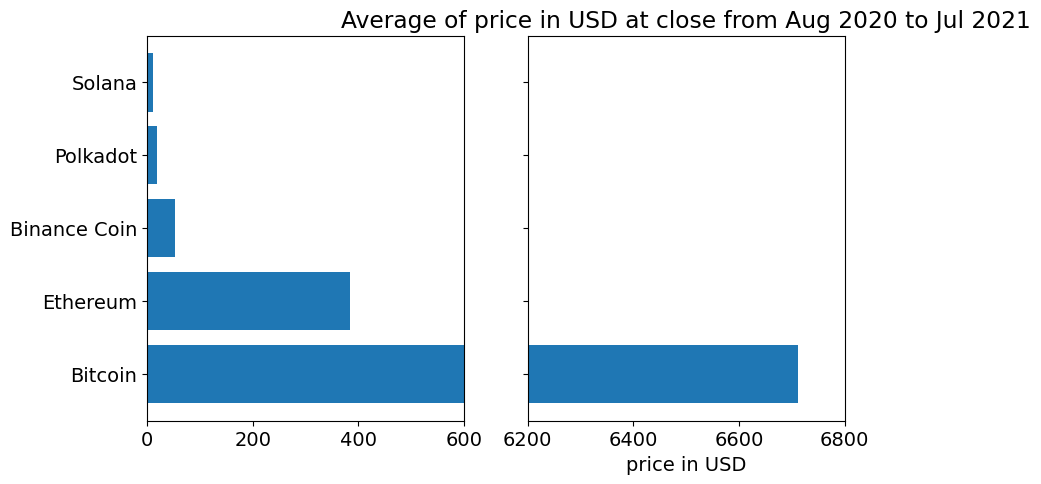

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.subplots_adjust(wspace=0.2)  # adjust space between axes

ax1.barh(cryptos_sp_df1.index, cryptos_sp_df1.values)
ax2.barh(cryptos_sp_df1.index, cryptos_sp_df1.values)

ax1.set_xlim(0,600)
ax2.set_xlim(6200,6800)

plt.xlabel('price in USD')
plt.title('Average of price in USD at close from Aug 2020 to Jul 2021');

Note that two subplots were created for visibility convenience. An enlightening information can be found in
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html

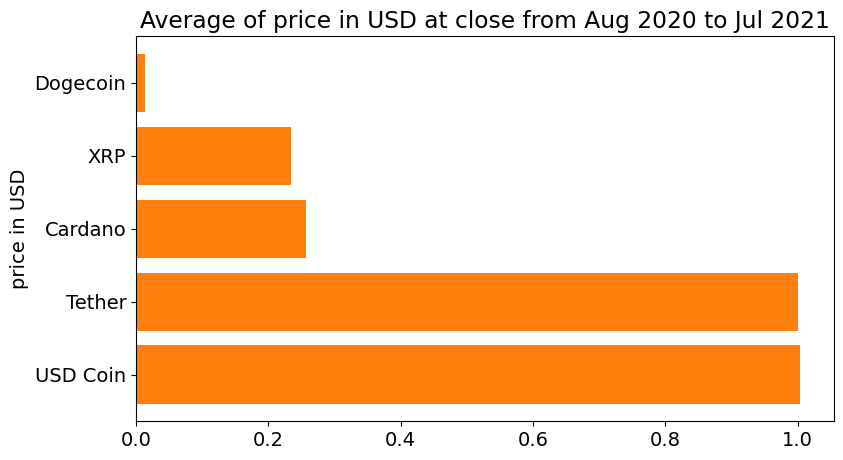

In [32]:
plt.barh(cryptos_sp_df2.index, cryptos_sp_df2.values)
plt.barh(cryptos_sp_df2.index, cryptos_sp_df2.values)

plt.ylabel('price in USD')
plt.title('Average of price in USD at close from Aug 2020 to Jul 2021');

Here the price of the top 5 coins at close will be examined between August 2020 and Juli 2021:

In [33]:
bitcoin_sp_df = bitcoin_df[bitcoin_df.Date >= start]
ethereum_sp_df = ethereum_df[ethereum_df.Date >= start]
binancecoin_sp_df = binancecoin_df[binancecoin_df.Date >= start]
solana_sp_df = solana_df[solana_df.Date >= start]
polkadot_sp_df = polkadot_df[polkadot_df.Date >= start]
dogecoin_sp_df = dogecoin_df[dogecoin_df.Date >= start]
tether_sp_df = tether_df[tether_df.Date >= start]
xrp_sp_df = xrp_df[xrp_df.Date >= start]
usdcoin_sp_df = usdcoin_df[usdcoin_df.Date >= start]
cardano_sp_df = cardano_df[cardano_df.Date >= start]

Firstly the return value of the function `df.plot()` is stored to a variable in order to pass it as argument in `ax=` to the next function(s). The reason is to plot two or more dataframes into one figure.

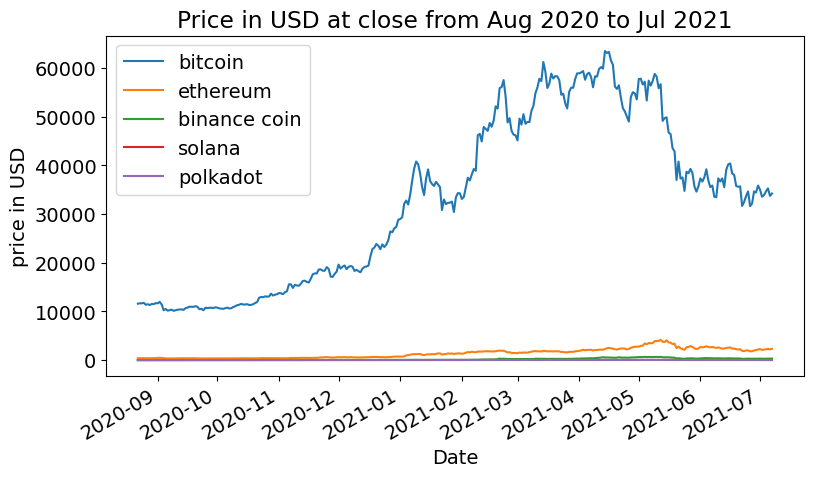

In [34]:
xy = bitcoin_sp_df.plot('Date', 'Close', label='bitcoin')
ethereum_sp_df.plot('Date', 'Close', ax=xy, label='ethereum')
binancecoin_sp_df.plot('Date', 'Close', ax=xy, label='binance coin')
solana_sp_df.plot('Date', 'Close', ax=xy, label='solana')
polkadot_sp_df.plot('Date', 'Close', ax=xy, label='polkadot')
plt.ylabel('price in USD')
plt.legend(loc='upper left');
plt.title('Price in USD at close from Aug 2020 to Jul 2021');

It would be nice to exclude `bitcoin` and `ethereum` on the next graph in order to have a more detailed look of the coins `binance-coin` , `solana` and `polkadot`:

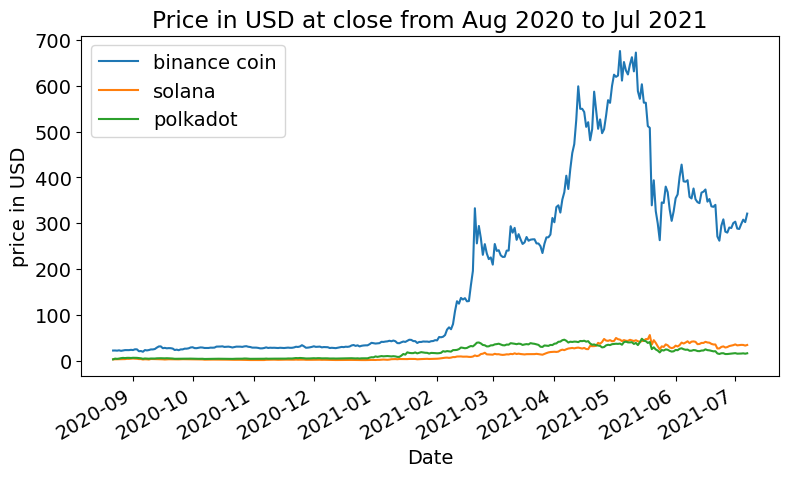

In [35]:
xy = binancecoin_sp_df.plot('Date', 'Close', label='binance coin')
solana_sp_df.plot('Date', 'Close', ax=xy, label='solana')
polkadot_sp_df.plot('Date', 'Close', ax=xy, label='polkadot')
plt.ylabel('price in USD')
plt.legend(loc='upper left')
plt.title('Price in USD at close from Aug 2020 to Jul 2021');

Now the next five coins will be illustrated:

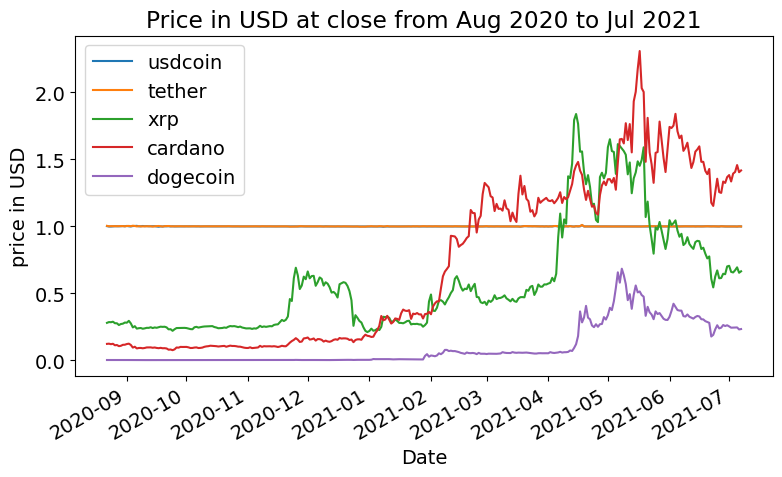

In [36]:
xy = usdcoin_sp_df.plot('Date', 'Close', label='usdcoin')
tether_sp_df.plot('Date', 'Close', ax=xy, label='tether')
xrp_sp_df.plot('Date', 'Close', ax=xy, label='xrp')
cardano_sp_df.plot('Date', 'Close', ax=xy, label='cardano')
dogecoin_sp_df.plot('Date', 'Close', ax=xy, label='dogecoin')
plt.ylabel('price in USD')
plt.legend(loc='upper left');
plt.title('Price in USD at close from Aug 2020 to Jul 2021');

It seems that `tether` and `USD coin` have very small fluctuations around the value 1 USD. Let's have a closer look at those two coins:

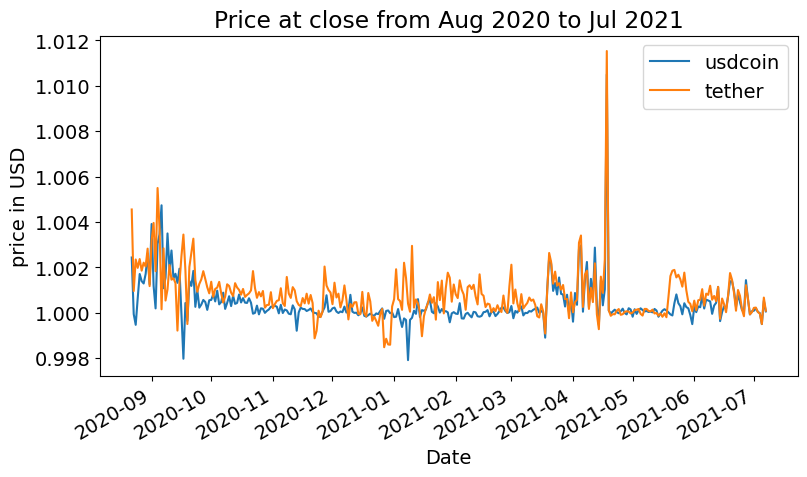

In [37]:
xy = usdcoin_sp_df.plot('Date', 'Close', label='usdcoin')
tether_sp_df.plot('Date', 'Close', ax=xy, label='tether')
plt.ylabel('price in USD')
plt.legend(loc='upper right');
plt.title('Price at close from Aug 2020 to Jul 2021');

Note that the `Open` column could also be used instead of `Close`, but this would not result in any visible change since the coin value at the close is approximately equal to the coin value at the opening of the next day.

Now let's zoom in the period between January 2021 and July 2021 to observe the high and low value fluctuations compared to the value at close. `bitcoin`and `dogecoin` are illustrated:

In [38]:
start='2021-01'

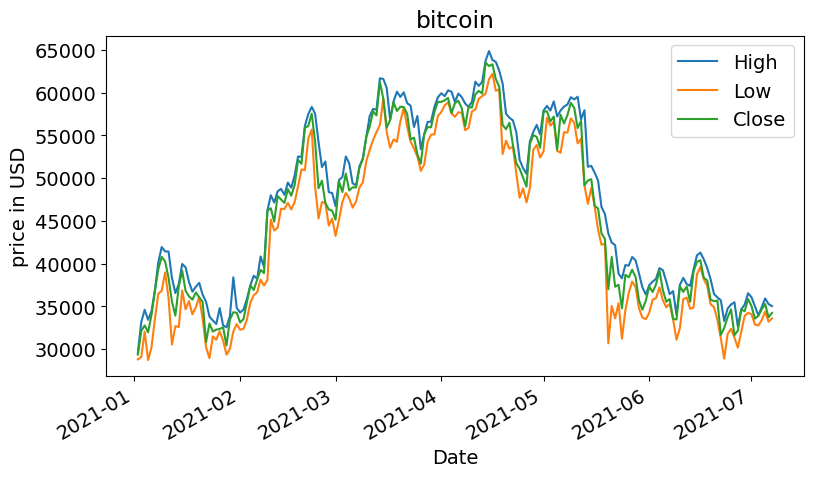

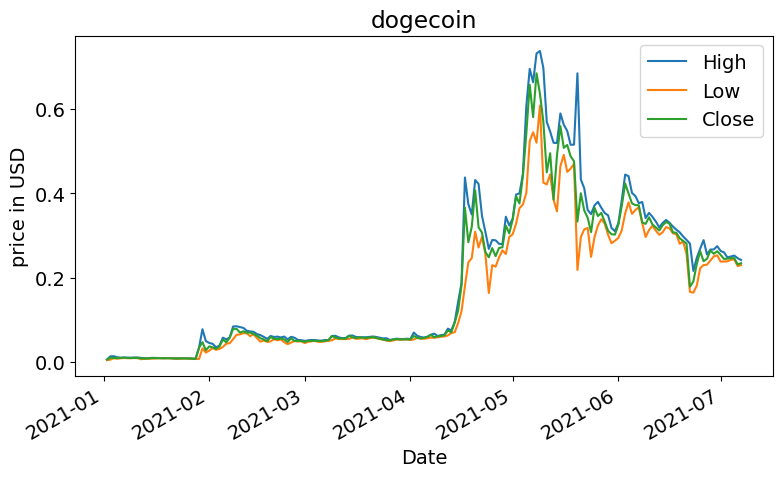

In [39]:
bitcoin_df[bitcoin_df.Date >= start].plot('Date',['High','Low','Close'])
plt.ylabel('price in USD')
plt.title('bitcoin')
dogecoin_df[dogecoin_df.Date >= start].plot('Date',['High','Low','Close'])
plt.ylabel('price in USD')
plt.title('dogecoin');

Last but not least, the histograms of the value at close of three coins are depicted, as well as the minimum value, the maximum value, the mean and the median between August 2020 and Juli 2021:

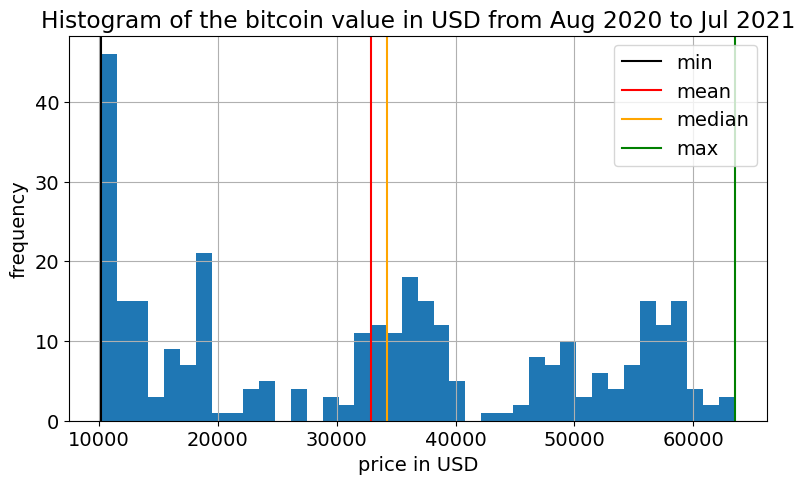

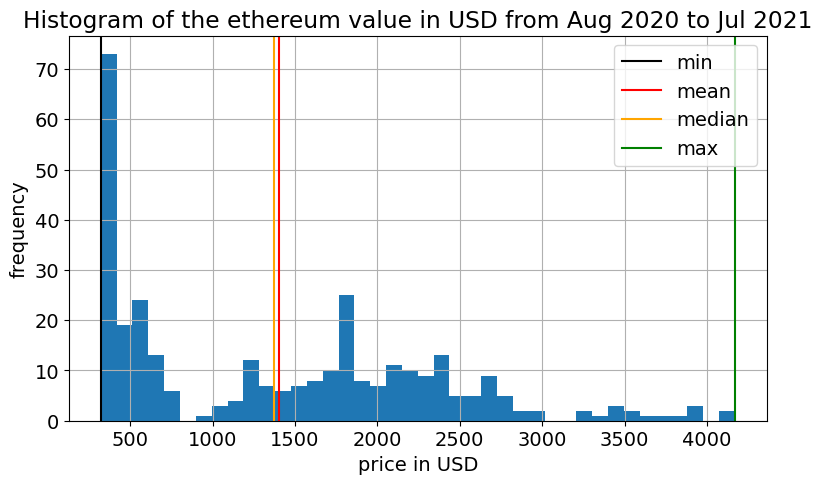

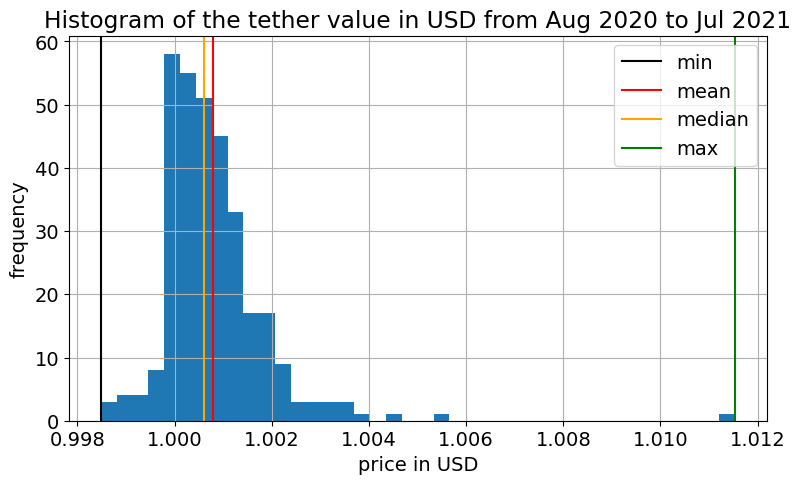

In [40]:
bitcoin_mean = bitcoin_sp_df.Close.mean()
bitcoin_median = bitcoin_sp_df.Close.median()
bitcoin_max = bitcoin_sp_df.Close.max()
bitcoin_min = bitcoin_sp_df.Close.min()
bitcoin_sp_df.hist('Close', bins=40)
plt.axvline(bitcoin_min, color='black', label='min')
plt.axvline(bitcoin_mean, color='red', label='mean')
plt.axvline(bitcoin_median, color='orange', label='median')
plt.axvline(bitcoin_max, color='green', label='max')
plt.xlabel('price in USD')
plt.ylabel('frequency')
plt.title('Histogram of the bitcoin value in USD from Aug 2020 to Jul 2021')
plt.legend(loc='upper right');

ethereum_mean = ethereum_sp_df.Close.mean()
ethereum_median = ethereum_sp_df.Close.median()
ethereum_max = ethereum_sp_df.Close.max()
ethereum_min = ethereum_sp_df.Close.min()
ethereum_sp_df.hist('Close', bins=40)
plt.axvline(ethereum_min, color='black', label='min')
plt.axvline(ethereum_mean, color='red', label='mean')
plt.axvline(ethereum_median, color='orange', label='median')
plt.axvline(ethereum_max, color='green', label='max')
plt.xlabel('price in USD')
plt.ylabel('frequency')
plt.title('Histogram of the ethereum value in USD from Aug 2020 to Jul 2021')
plt.legend(loc='upper right');

tether_mean = tether_sp_df.Close.mean()
tether_median = tether_sp_df.Close.median()
tether_max = tether_sp_df.Close.max()
tether_min = tether_sp_df.Close.min()
tether_sp_df.hist('Close', bins=40)
plt.axvline(tether_min, color='black', label='min') # vertical line
plt.axvline(tether_mean, color='red', label='mean')
plt.axvline(tether_median, color='orange', label='median')
plt.axvline(tether_max, color='green', label='max')
plt.xlabel('price in USD')
plt.ylabel('frequency')
plt.title('Histogram of the tether value in USD from Aug 2020 to Jul 2021')
plt.legend(loc='upper right');

## Asking and Answering Questions

In this section we are going to deep further into the data analysis of the cryptocurrencies that were already described. Some questions will be posed and they are going to be answered either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn.
Additional information about plotting can be found in the following links:  
https://jovian.ai/aakashns/dataviz-cheatsheet  
https://jovian.ai/aakashns/python-matplotlib-data-visualization  
https://matplotlib.org/stable/tutorials/index  
http://seaborn.pydata.org/index.html

#### Q1: Is there a correlation among market capitalization, volume and the price of the cryptocurrency?

First of all, let's find out about the correlation between volume and market capitalization. For convenience, the cryptocoins are seperated into two groups:

In [41]:
cf1 = (cryptos_df.Name == 'Bitcoin') | (cryptos_df.Name == 'Ethereum') | (cryptos_df.Name == 'Tether') | (cryptos_df.Name == 'XRP') | (cryptos_df.Name == 'Cardano')
cf2 = (cryptos_df.Name != 'Bitcoin') & (cryptos_df.Name != 'Ethereum') & (cryptos_df.Name != 'Tether') & (cryptos_df.Name != 'XRP') & (cryptos_df.Name != 'Cardano')
#apply the coin filters cf1 and cf2
cryptos_df1 = cryptos_df[cf1]
cryptos_df2 = cryptos_df[cf2]

The `scatterplot()` function of the `seaborn` library is used here and is a very convenient function because it can plot a dataset whose X axis can have duplicates. The `plt.show()` function is used to plot the next plotting function on another diagram.

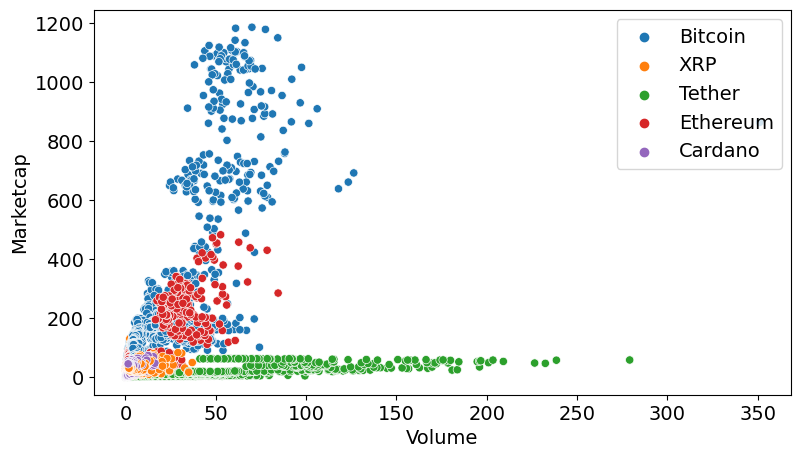

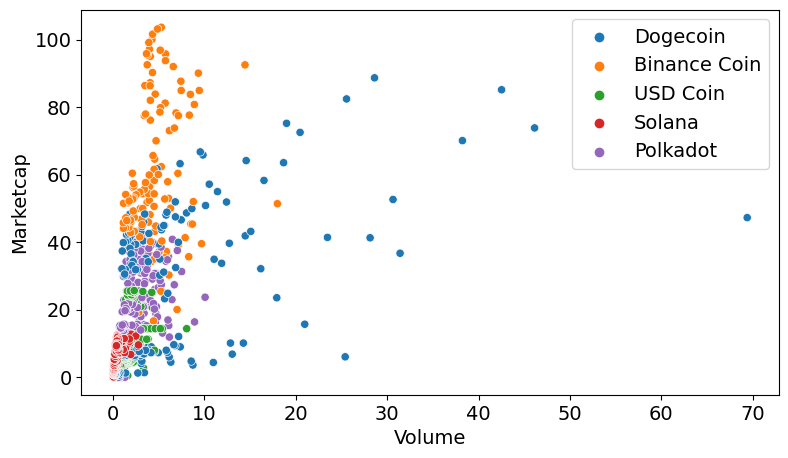

In [42]:
sns.scatterplot(x=cryptos_df1.Volume, y=cryptos_df1.Marketcap, hue=cryptos_df1.Name)
plt.legend(loc='upper right');
plt.show();
sns.scatterplot(x=cryptos_df2.Volume, y=cryptos_df2.Marketcap, hue=cryptos_df2.Name)
plt.legend(loc='upper right');

There might be an overall weak positive correlation between volume and market capitalization.

What is the correlation between volume and coin's price?

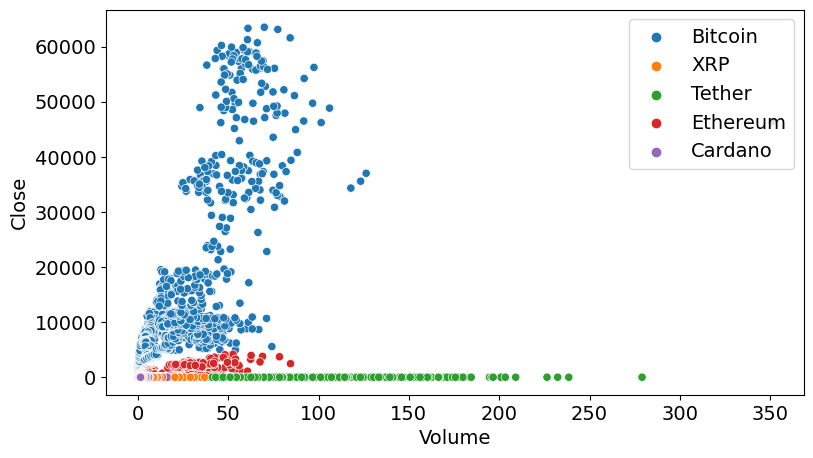

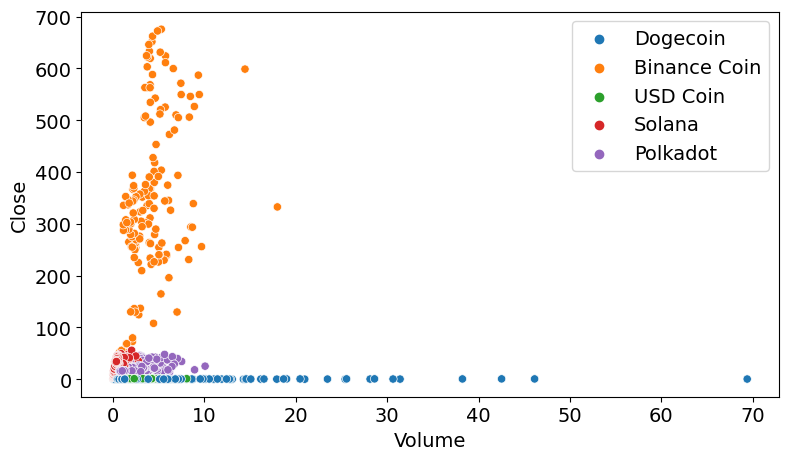

In [43]:
sns.scatterplot(x=cryptos_df1.Volume, y=cryptos_df1.Close, hue=cryptos_df1.Name);
plt.legend(loc='upper right');
plt.show();
sns.scatterplot(x=cryptos_df2.Volume, y=cryptos_df2.Close, hue=cryptos_df2.Name)
plt.legend(loc='upper right');

There might be an overall mediocre positive correlation between volume and coin value.

What is the correlation between market capitalization and coin value?

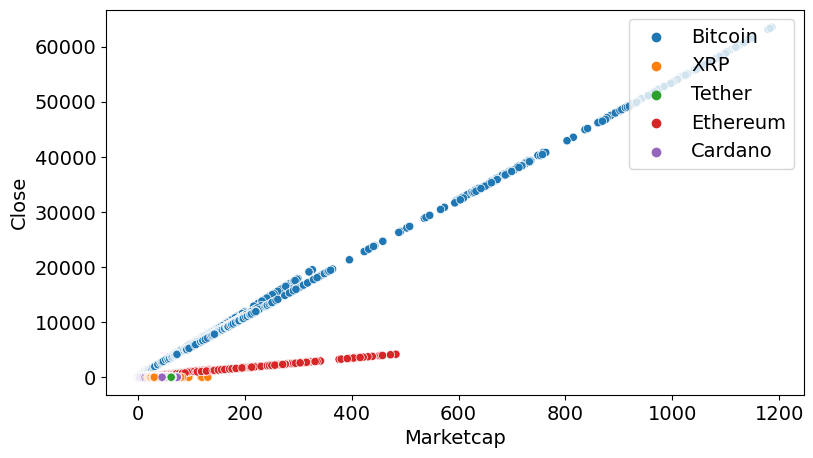

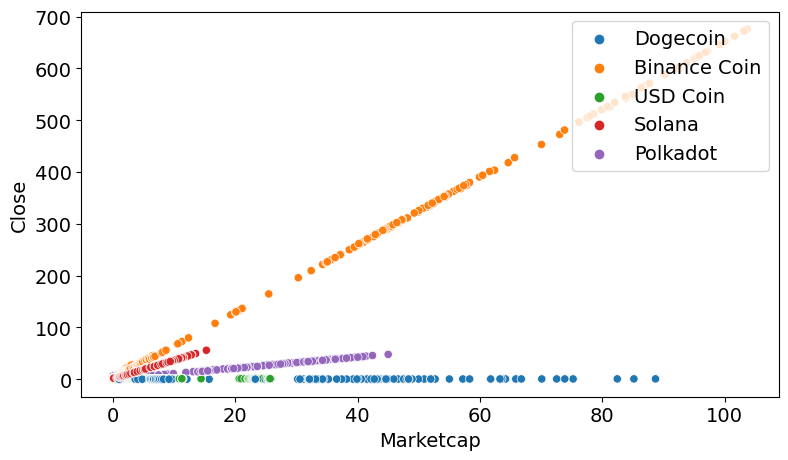

In [44]:
sns.scatterplot(x=cryptos_df1.Marketcap, y=cryptos_df1.Close, hue=cryptos_df1.Name);
plt.legend(loc='upper right');
plt.show();
sns.scatterplot(x=cryptos_df2.Marketcap, y=cryptos_df2.Close, hue=cryptos_df2.Name)
plt.legend(loc='upper right');

It seems that there is a strong positive correlation between market capitalization and coin value.

#### Q2: What was the highest ratio of each currency since the beginning of their circulation?

Before doing anything else, let's sort each dataframe by date in ascending order:

In [45]:
for m in range(0,10):
    cryptolist[m].sort_values('Date')

To answer this question it is needed firstly to create to the dataframe a new column named `Relvalue`. `Relvalue` is the ratio of the coin's price in a specific date to the coin's price at the very first date of its circulation:

In [46]:
for m in range(0,10):
    cryptolist[m]['Relvalue'] = cryptolist[m].High / cryptolist[m].loc[0].Open

Making a dataframe from the list of dataframes of each individual coin:

In [47]:
cryptos_df = pd.concat(cryptolist, axis=0)

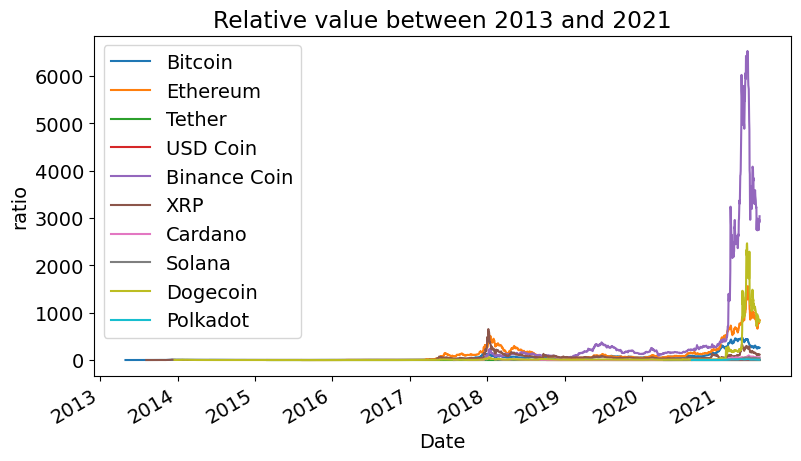

In [48]:
xy = cryptolist[0].plot('Date', 'Relvalue', label=cryptolist[0].loc[0].Name)
for m in range(1,10):
    cryptolist[m].plot('Date', 'Relvalue', label=cryptolist[m].loc[0].Name, ax=xy)

plt.ylabel('ratio')
plt.title('Relative value between 2013 and 2021');

A closer look into the period August 2020 - July 2021:

In [49]:
start = '2020-08'

cryptolist_sp = [
bitcoin_sp_df,
ethereum_sp_df,
tether_sp_df,
usdcoin_sp_df,
binancecoin_sp_df,
xrp_sp_df,
cardano_sp_df,
solana_sp_df,
dogecoin_sp_df,
polkadot_sp_df
]

for m in range(0,10):
    cryptolist_sp[m] = cryptolist[m][cryptolist[m].Date >= start]
    

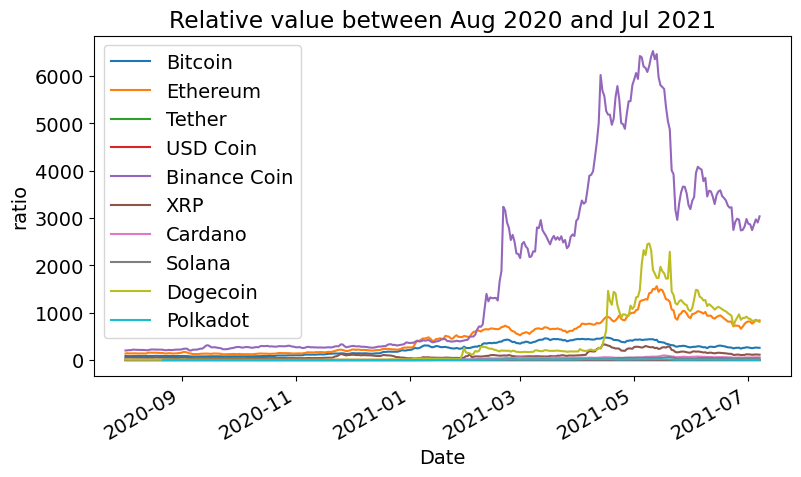

In [50]:
xy = cryptolist_sp[0].plot('Date', 'Relvalue', label=cryptolist[0].loc[0].Name)

for m in range(1,10):
    cryptolist_sp[m].plot('Date', 'Relvalue', ax=xy, label=cryptolist[m].loc[0].Name)

plt.ylabel('ratio')
plt.title('Relative value between Aug 2020 and Jul 2021');

In [51]:
maxval_df = cryptos_df.groupby(['Name'])['Relvalue'].max()
maxval_df.sort_values(ascending=False, inplace=True)
maxval_df

Name
Binance Coin    6524.812390
Dogecoin        2464.206583
Ethereum        1561.462132
XRP              653.971710
Bitcoin          482.454396
Cardano          100.043331
Solana            61.303490
Polkadot          17.153702
USD Coin           1.108995
Tether             1.001570
Name: Relvalue, dtype: float64

It seems that `binance coin` had the greatest increase of all coins since the beginning of its starting date. Its maximum price were more than 6524 times its initial value. On the other hand, the smallest increase had `tether` with the rate of 1.00157 . This means that the price of that coin exceeded barely its starting price until Juli 2021.

#### Q3: Which coins had the highest daily rate of the increase and decrease in their values and what was these amounts?

Firstly, a column named `Dvalue` is created with the rate of change in the price of the coin.

In [52]:
for m in range(0,10):
    cryptolist[m]['Dvalue'] = (cryptolist[m].Close - cryptolist[m].Open) / cryptolist[m].Open

In [53]:
cryptos_df = pd.concat(cryptolist, axis=0)

In [54]:
maxrate_df = cryptos_df.groupby(['Name'])['Dvalue'].max()
maxrate_df.sort_values(ascending=False, inplace=True)
maxrate_df

Name
Dogecoin        3.556254
XRP             1.787836
Cardano         1.365243
Binance Coin    0.966026
Polkadot        0.557958
Ethereum        0.508091
Solana          0.471516
Bitcoin         0.416811
Tether          0.061712
USD Coin        0.042864
Name: Dvalue, dtype: float64

`Dogecoin` had the highest increase of its price within a day with a value of 3.556254 (or 355.6%).

In [55]:
minrate_df = cryptos_df.groupby(['Name'])['Dvalue'].min()
minrate_df.sort_values(ascending=True, inplace=True)
minrate_df

Name
Ethereum       -0.730354
XRP            -0.452286
Dogecoin       -0.437992
Binance Coin   -0.419098
Cardano        -0.395344
Polkadot       -0.379998
Solana         -0.374084
Bitcoin        -0.371869
Tether         -0.049762
USD Coin       -0.030503
Name: Dvalue, dtype: float64

`Ethereum` had the highest decrease of its price within a day with a value of 0.730354 (or 73%).

#### Q4: What was the amount of coins in existence for each cryptocurrency?

Since the market capitalization equals to the product of the price of the coin and the total amount of coins in circulation, 
the circulation can be derived from the formula:  
$$
\\
circulation = \frac{marketcapitalization}{price} 
\\
$$

In [56]:
for m in range(0,10):
    cryptolist[m]['Circ'] = cryptolist[m].Marketcap / cryptolist[m].Close

Creating a general dataframe from the edited dataframes:

In [57]:
cryptos_df = pd.concat(cryptolist, axis=0)

In [58]:
start = '2020-08' # select starting date

And here the group is yet again divided into two smaller groups:

In [59]:
cryptos_df0 = cryptos_df[cryptos_df.Date >= start] # apply the filter
cryptos_df1 = cryptos_df0.groupby(['Name'])['Circ'].mean().sort_values(ascending=False)
cryptos_df2 = cryptos_df1
cryptos_df1 = cryptos_df1.head(5)
cryptos_df2 = cryptos_df2.tail(5)

Concerning group A:

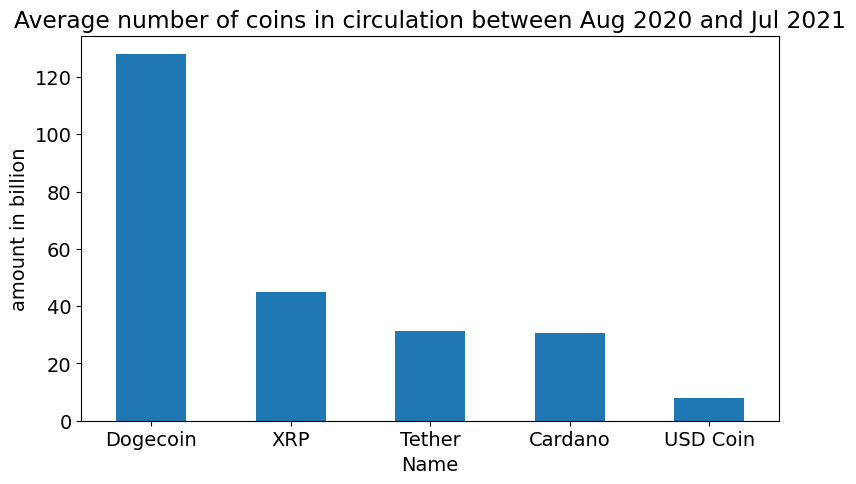

In [60]:
cryptos_df1.plot.bar(rot=0)
plt.ylabel('amount in billion')
plt.title('Average number of coins in circulation between Aug 2020 and Jul 2021');

Concerning group B:

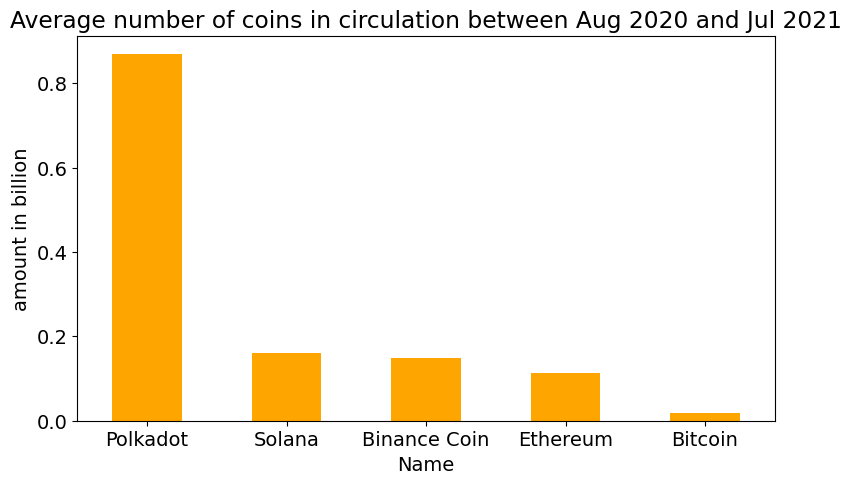

In [61]:
cryptos_df2.plot.bar(color='orange', rot=0)
plt.ylabel('amount in billion')
plt.title('Average number of coins in circulation between Aug 2020 and Jul 2021');

Here the amount of the circulation of each coin of the first group with respect to the date for the whole time period is illustrated:

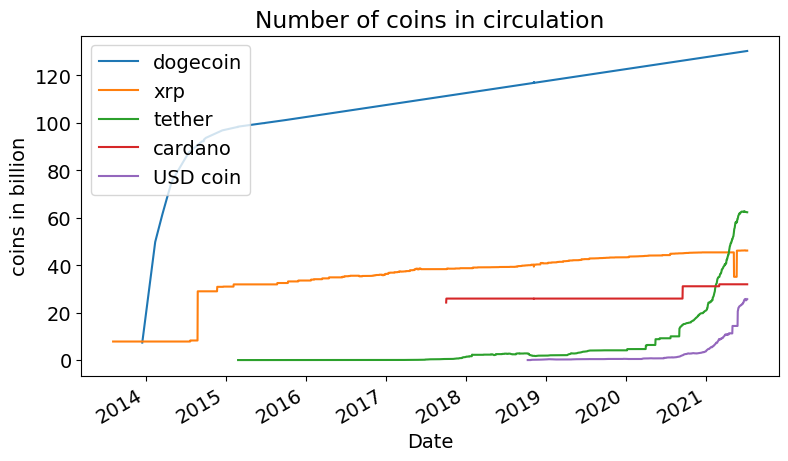

In [62]:
xy = dogecoin_df.plot('Date', 'Circ', label='dogecoin')
xrp_df.plot('Date', 'Circ', ax=xy, label='xrp')
tether_df.plot('Date', 'Circ', ax=xy, label='tether')
cardano_df.plot('Date', 'Circ', ax=xy, label='cardano')
usdcoin_df.plot('Date', 'Circ', ax=xy, label='USD coin')
plt.legend(loc='upper left')
plt.ylabel('coins in billion')
plt.title('Number of coins in circulation');

And the second group respectively:

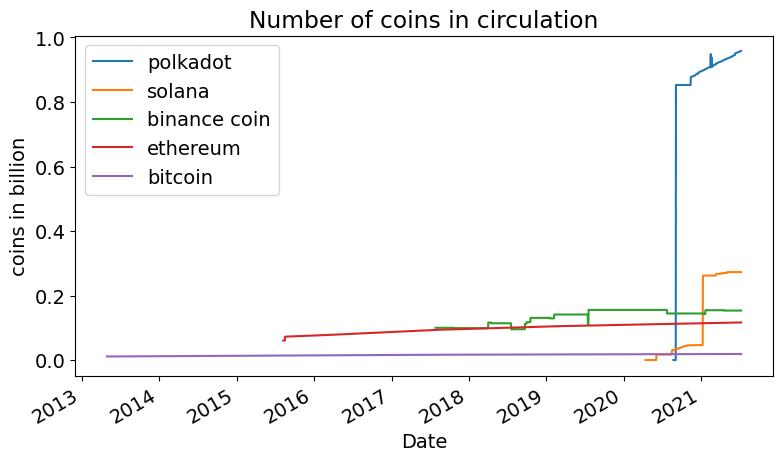

In [63]:
xy = polkadot_df.plot('Date', 'Circ', label='polkadot')
solana_df.plot('Date', 'Circ', ax=xy, label='solana')
binancecoin_df.plot('Date', 'Circ', ax=xy, label='binance coin')
ethereum_df.plot('Date', 'Circ', ax=xy, label='ethereum')
bitcoin_df.plot('Date', 'Circ', ax=xy, label='bitcoin')
plt.legend(loc='upper left')
plt.ylabel('coins in billion')
plt.title('Number of coins in circulation');

Let's find out what the circulation among the cryptocurrencies on the last day of the dataset is (on 2021-07-06):

In [64]:
cryptos_df0 = cryptos_df[cryptos_df.Date == end] # select last day
cryptos_df0 = cryptos_df0.groupby('Name')['Circ'].mean().sort_values(ascending=False)
cryptos_df0

Name
Dogecoin        130.331410
Tether           62.328223
XRP              46.171816
Cardano          31.946328
USD Coin         25.671714
Polkadot          0.958136
Solana            0.272637
Binance Coin      0.153433
Ethereum          0.116588
Bitcoin           0.018750
Name: Circ, dtype: float64

The greatest amount of circulation on 2021-07-06 (the last day in the dataset) had `dogecoin` with more than 130 billion coins, whereas the less amount had `bitcoin` with more than 18 million coins.

#### Q5: Which coin is the most volatile and which is the least volatile?

The volatility of a coin is proportional to the fluctuations it has experienced in a specific time period. A stable coin on the other hand has a very small value of volatility. One way to derive this coefficient is to measure its standard deviation:

In [65]:
for m in range(0,10):
    cryptolist[m]['Dsquared'] = cryptolist[m].Close.std()

One last time to make a total dataframe:

In [66]:
cryptos_df = pd.concat(cryptolist, axis=0)

In [67]:
cryptos_df0 = cryptos_df[cryptos_df.Date >= start] # apply filter
cryptos_df0 = cryptos_df0.groupby('Name')['Close'].std().sort_values(ascending=False)
cryptos_df0

Name
Bitcoin         17410.693944
Ethereum          958.441868
Binance Coin      190.034488
Solana             14.953238
Polkadot           13.735707
Cardano             0.613379
XRP                 0.390857
Dogecoin            0.152637
Tether              0.001701
USD Coin            0.001046
Name: Close, dtype: float64

The most volatile coin in the time period 2020-08 to 2021-07 was `bitcoin`. The least volatile coin in the same period was `USD coin`.

## Inferences and Conclusion

In conclusion, a lot of factors affect the price of the coin. Furthermore, one can make a great deal of inferences some of which are:   
The market capitalization plays a major role to the popularity of the coin and additionally
could make the investments more reliable.  
The volume has a similar function to market capitalization, but it seems that they
might have a weak positive correlation.  
The price of the cryptocurrency is strongly affected by the supply and demand laws.
What also might be correlated is the number of coins in circulation. The less the availability,
the greater the demand for the coin and thus the higher gets the price.  
Finally, the fluctuations of the coin's value within a time period can affect hte investors either positively or negatively, but the greater the fluctuations, the greater the risk. The standard deviation can be used to measure the volatility of the cryptocurrency.  


## References and Future Work

A potential future work could be an expansion to this dataset until the current day,
so as for some questions to be answered, such as what the future of the cryptocurrencies is,
in which coin should someone invest or how the market can be influenced when a new currency is created, to name a few.

Useful links:  
https://bitcoinmagazine.com/markets/  
https://academy.binance.com/en/glossary  
https://www.investopedia.com/terms  
https://www.bankrate.com/investing/